#**🌐Business analysis of a supermarket in the United States**🌐
[Resource](https://www.kaggle.com/datasets/ibrahimelsayed182/superstore)
### By : Alejandro Thompson Oporto

---

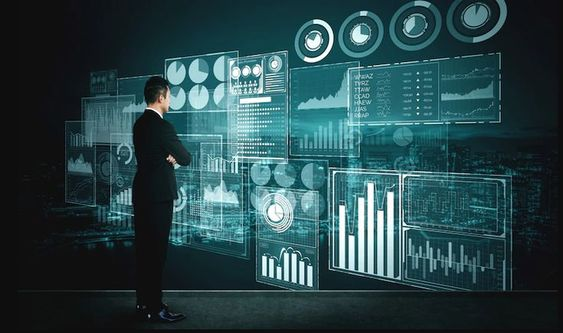




# Importing libraries and extracting data

In [ ]:
pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
import circlify
import squarify
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#Extracting data
df = pd.read_csv("/content/SuperstoreDataset.csv")
df

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 17
0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN
1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN
2,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN
3,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN
4,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,NaN
9990,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,NaN
9991,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,NaN
9992,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,NaN


# Data wrangling and cleaning 

In [ ]:
#Check for duplicates
df[df.duplicated(keep=False)]

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 17
3405,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588,NaN
3406,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588,NaN


In [ ]:
df.shape

(9994, 18)

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(9993, 18)

In [ ]:
#Remove column
del df["Unnamed: 17"]

In [ ]:
df.shape

(9993, 17)

In [ ]:
# Check for duplicates
duplicates = df.duplicated()

# Show the result
if duplicates.any():
    print('There are duplicates in the data file.')
else:
    print('There are no duplicates in the data file.')

There are no duplicates in the data file.


In [ ]:
#Check for null values
df.isnull().sum()

Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.columns

Index(['Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# **Business analysis**

## Sales by ship mode

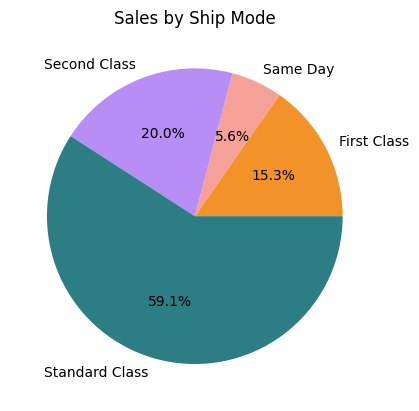

In [ ]:
#@title
# Group the data by "Ship Mode" and sum the "Sales"
grouped_data = df.groupby('Ship Mode')['Sales'].sum()

# Create a color palette with the specified colors
palette = ["#F4922A", "#F5A197", "#B88DF5","#2D7D85"]

# Create a pie chart
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=palette)

# Set the title
plt.title('Sales by Ship Mode')

# Show the plot
plt.show()

We can say that most of the sales are finalized 
through the ship mode Standard Class.

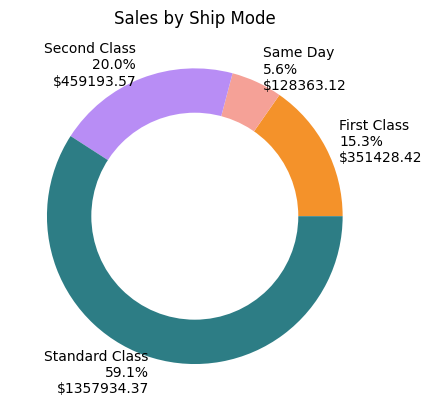

In [ ]:
#@title
# Group the data by "Ship Mode" and sum the "Sales"
grouped_data = df.groupby('Ship Mode')['Sales'].sum()

# Create a color palette with a gradient from dark blue to light blue
palette = ["#F4922A", "#F5A197", "#B88DF5","#2D7D85"]

# Create custom labels with Ship Mode, percentage, and sales figure
labels = [f"{index}\n{value / grouped_data.sum():.1%}\n${value:.2f}" for index, value in grouped_data.items()]

# Create a doughnut chart
plt.pie(grouped_data.values, labels=labels, colors=palette)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set the title
plt.title('Sales by Ship Mode')

# Show the plot
plt.show()

Same-day deliveries represent approximately 6% of total sales.

In [ ]:
#@title
color_scale = ["#F4922A","#F5A197", "#2D7D85", "#B88DF5"]

fig = px.sunburst(df, path=['Ship Mode', 'Category',"Sub-Category"], values='Sales', color='Ship Mode',
                  color_discrete_sequence=color_scale)
fig.update_traces(textfont_size=14)
fig.update_layout(width=800, height=800)
fig.show()

* In the standard class, telephones are the most sold products.
* In the second class and same day shipping we can see that chairs are the ones that are normally shipped by that means.
* In the first class, technology products are the most sold products.





## Sales by Segment and category

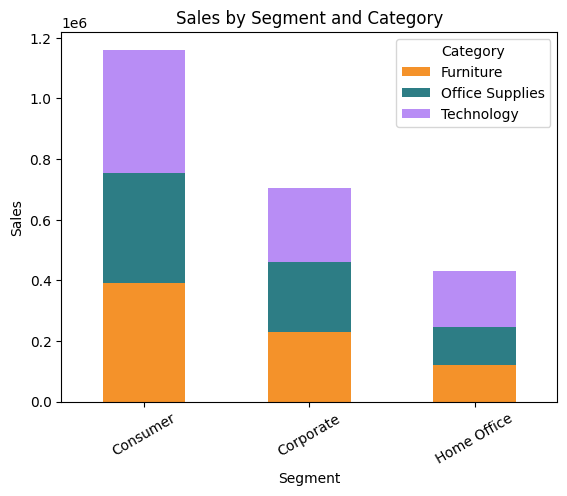

In [ ]:
#@title
# Create a color palette with a gradient from dark blue to light blue
palette = ["#F4922A", "#2D7D85", "#B88DF5"]

# Pivot the data to create a stacked bar chart
pivoted_data = df.pivot_table(index='Segment', columns='Category', values='Sales', aggfunc='sum')

# Create a stacked bar chart with "Segment", "Category", and "Sales"
pivoted_data.plot(kind='bar', stacked=True, color=palette)

# Set the title and labels
plt.title('Sales by Segment and Category')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.xticks(rotation=30)
# Show the plot
plt.show()

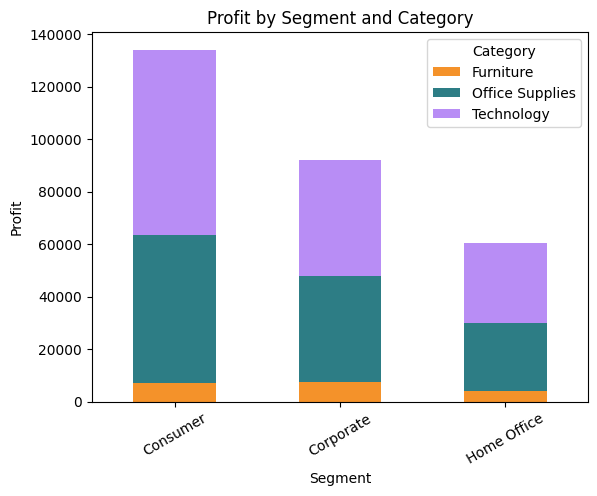

In [ ]:
#@title
# Create a color palette with a gradient from dark blue to light blue
palette = ["#F4922A", "#2D7D85", "#B88DF5"]

# Pivot the data to create a stacked bar chart
pivoted_data = df.pivot_table(index='Segment', columns='Category', values='Profit', aggfunc='sum')

# Create a stacked bar chart with "Segment", "Category", and "Profit"
pivoted_data.plot(kind='bar', stacked=True, color=palette)

# Set the title and labels
plt.title('Profit by Segment and Category')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.xticks(rotation=30)
# Show the plot
plt.show()

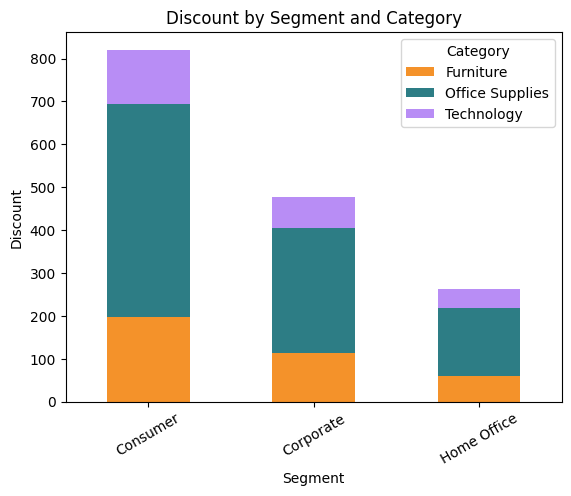

In [ ]:
#@title
# Create a color palette with a gradient from dark blue to light blue
palette = ["#F4922A", "#2D7D85", "#B88DF5"]

# Pivot the data to create a stacked bar chart
pivoted_data = df.pivot_table(index='Segment', columns='Category', values='Discount', aggfunc='sum')

# Create a stacked bar chart with "Segment", "Category", and "Discount"
pivoted_data.plot(kind='bar', stacked=True, color=palette)

# Set the title and labels
plt.title('Discount by Segment and Category')
plt.xlabel('Segment')
plt.ylabel('Discount')
plt.xticks(rotation=30)
# Show the plot
plt.show()

While everyday consumers may be the biggest buyers, it is important not to neglect home office and corporate customers, as they can also be a valuable source of revenue and loyalty.

Rather than focusing on a single segment, my strategy would be to develop specific programs and promotions for each of them. For example, we could offer discounts and special offers for everyday consumers who buy large quantities of products, while for home office customers we could offer home delivery options and customized packages.

Although we must have promotions and discounts, we 
must set limits for certain items because later we will see how the issue of discounts generates losses in many of our branches.

## Top selling products 



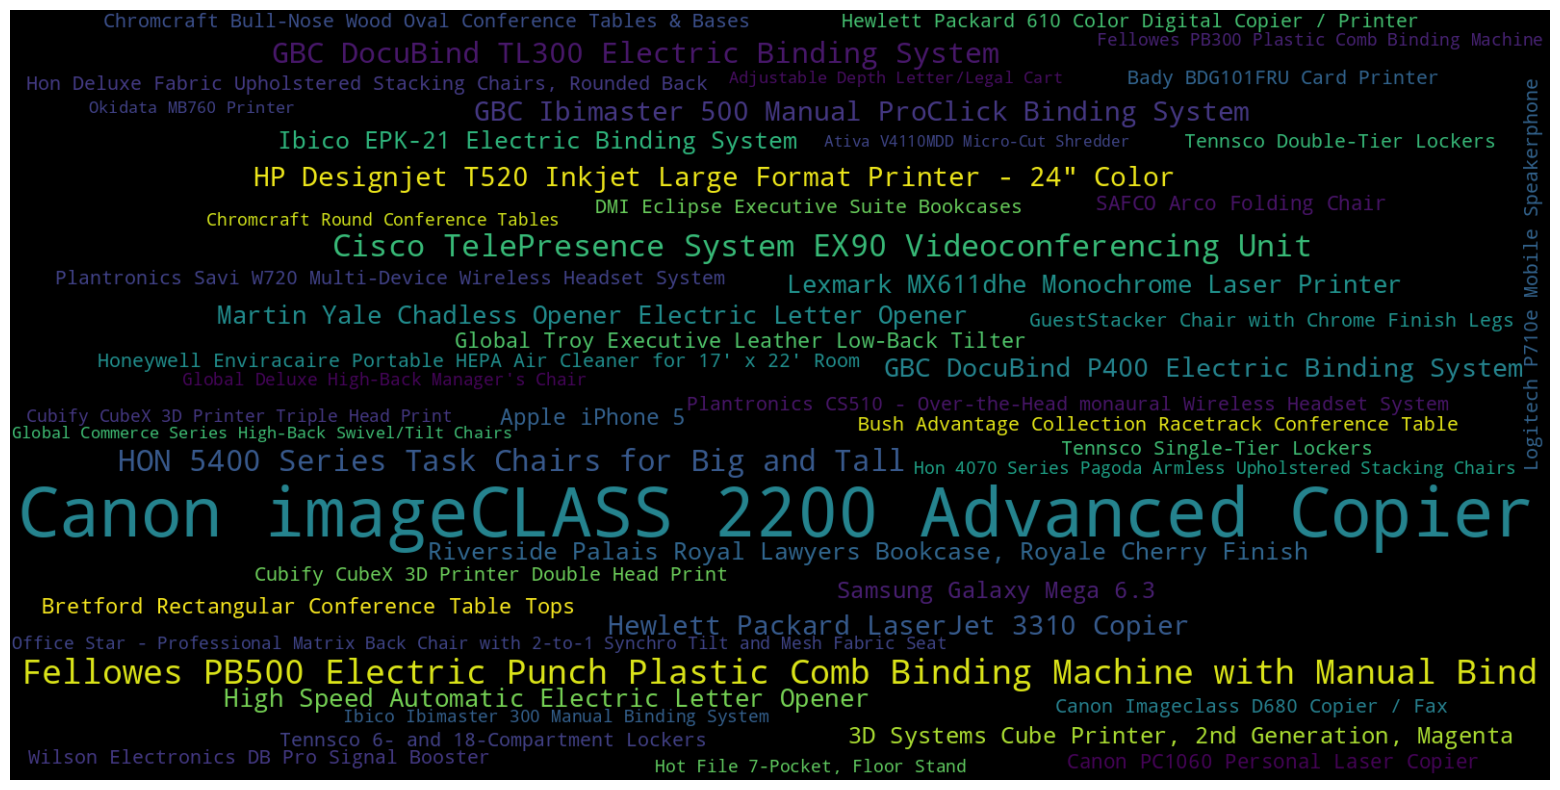

In [ ]:
#@title
# Group the data by "Product" and sum the "Sales"
grouped_data = df.groupby('Product Name')['Sales'].sum()

# Sort the data by profit and select the top 50 products
top_products = grouped_data.sort_values(ascending=False).head(50)

# Create a dictionary with product names and profits
product_profit = dict(zip(top_products.index, top_products.values))

# Create a word cloud with product names and profits
wordcloud = WordCloud(width=1600, height=800, max_font_size=200)
wordcloud.generate_from_frequencies(product_profit)

# Show the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Products with higher profits

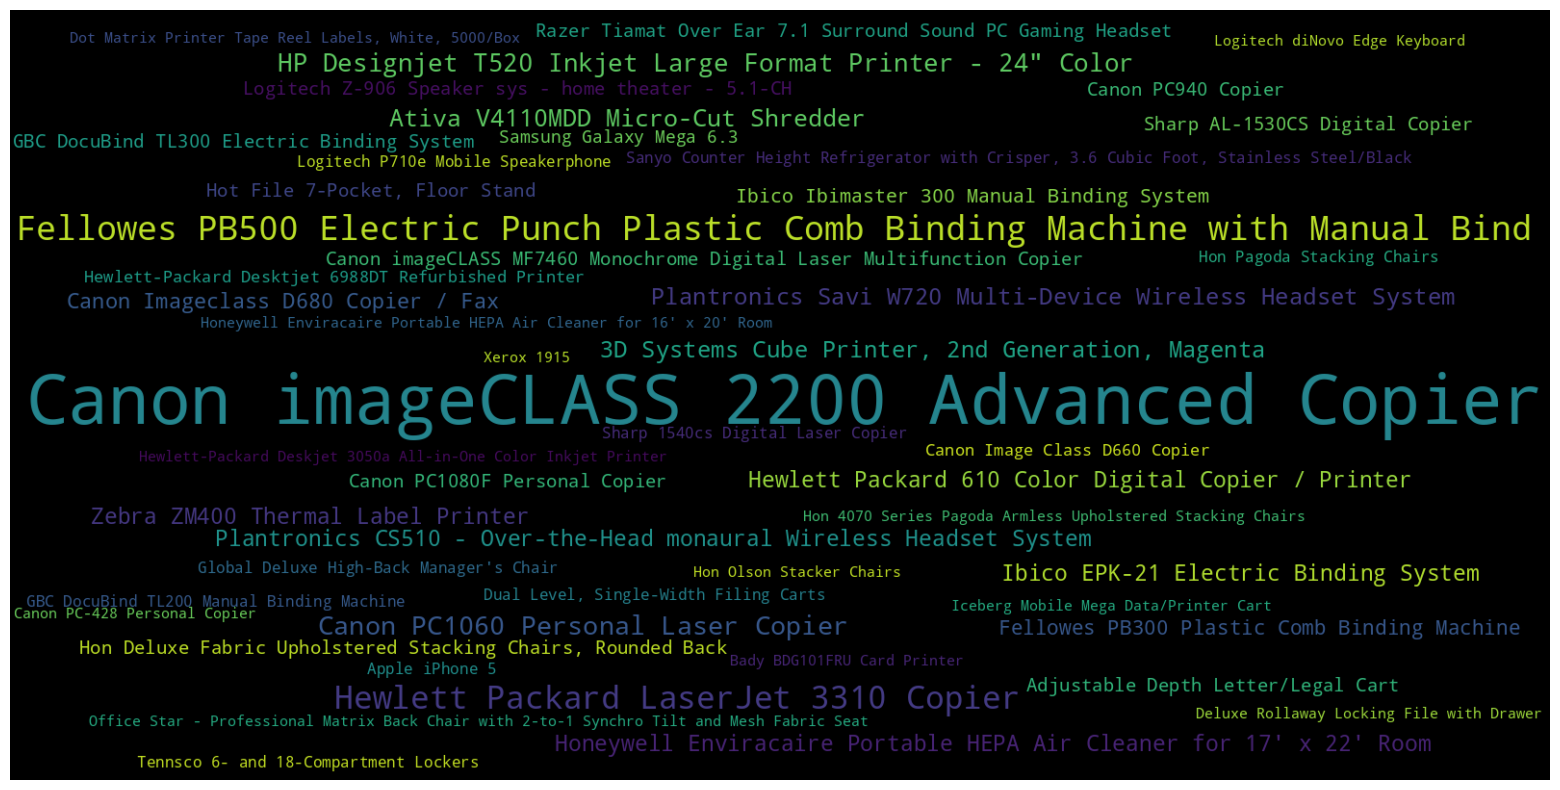

In [ ]:
#@title
# Group the data by "Product" and sum the "Profit"
grouped_data = df.groupby('Product Name')['Profit'].sum()

# Sort the data by profit and select the top 50 products
top_products = grouped_data.sort_values(ascending=False).head(50)

# Create a dictionary with product names and profits
product_profit = dict(zip(top_products.index, top_products.values))

# Create a word cloud with product names and profits
wordcloud = WordCloud(width=1600, height=800, max_font_size=200)
wordcloud.generate_from_frequencies(product_profit)

# Show the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Customers that generate more revenue

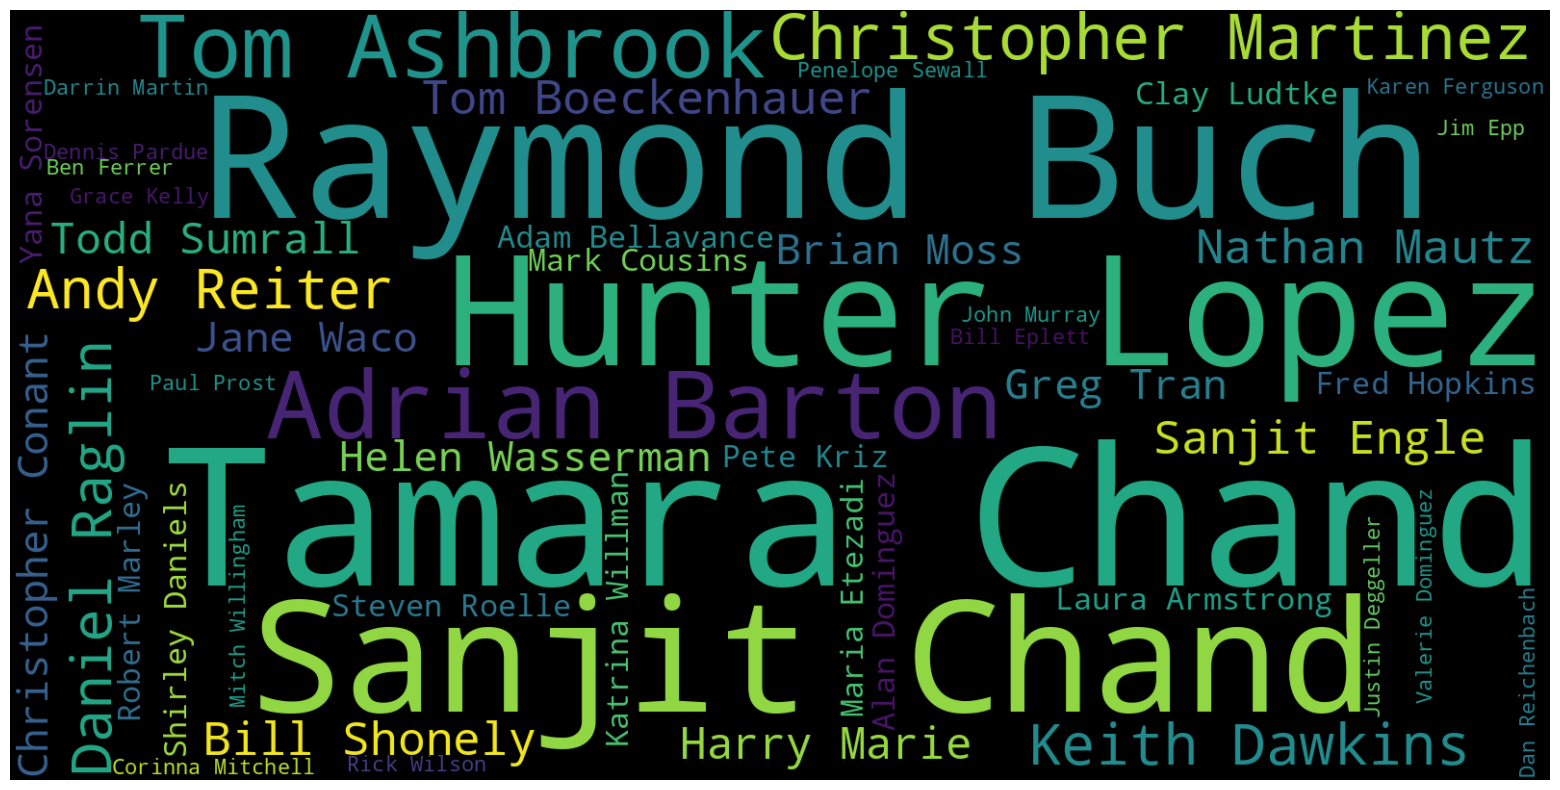

In [ ]:
#@title
# Group the data by "Product" and sum the "Profit"
grouped_data = df.groupby('Customer Name')['Profit'].sum()

# Sort the data by profit and select the top 50 products
top_products = grouped_data.sort_values(ascending=False).head(50)

# Create a dictionary with product names and profits
product_profit = dict(zip(top_products.index, top_products.values))

# Create a word cloud with product names and profits
wordcloud = WordCloud(width=1600, height=800, max_font_size=200)
wordcloud.generate_from_frequencies(product_profit)

# Show the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Pareto Analysis

In [ ]:
#@title
# Group the data by subcategory and calculate the sum of profit and quantity of products sold per subcategory.
df_grouped = df.groupby('Sub-Category').agg({'Profit': 'sum', 'Quantity': 'count'}).reset_index()

# Sort the profit values in descending order
df_grouped = df_grouped.sort_values(by='Profit', ascending=False)

# Create an interactive bar chart
fig = px.bar(df_grouped, x='Sub-Category', y='Profit', text='Quantity', color='Profit',
             color_continuous_scale=['#F4922A', '#2D7D85'])
fig.update_layout(title='Profit and quantity of products sold by subcategory',
                  xaxis_title='Subcategory', yaxis_title='Profit')
fig.show()

As we can see the sale of a high quantity of products does not mean that we are making a profit. We can see that the sale of 319 tables may be encouraging, but the reality is that it does not compare to the sale of only 68 copiers. We can see that we are making a loss.

That is to say that approximately 23% of the products sold add up to more than 77% of the products marketed.  The Pareto principle is proven

In [ ]:
#@title
# Group the data by category and calculate the sum of profit and quantity of products sold by category.
df_grouped = df.groupby('Category').agg({'Profit': 'sum', 'Quantity': 'count'}).reset_index()

# Sort the profit values in descending order
df_grouped = df_grouped.sort_values(by='Profit', ascending=False)

# Create an interactive bar chart
fig = px.bar(df_grouped, x='Category', y='Profit', text='Quantity', color='Profit',
             color_continuous_scale=['#F4922A', '#2D7D85'])
fig.update_layout(title='Profit and quantity of products sold by category',
                  xaxis_title='Category', yaxis_title='Profit')
fig.show()

Technology products generate more profit than Office suplies and furniture. Different types of promotions could be implemented with furniture that may imply a longer collection period, but this in order to improve furniture sales, since they are not making good profits. We could also be drastic and change the business model and focus on purely technology, but this would also have consequences. There are many decisions that could be made with this analysis.

# States and cities that generate profits

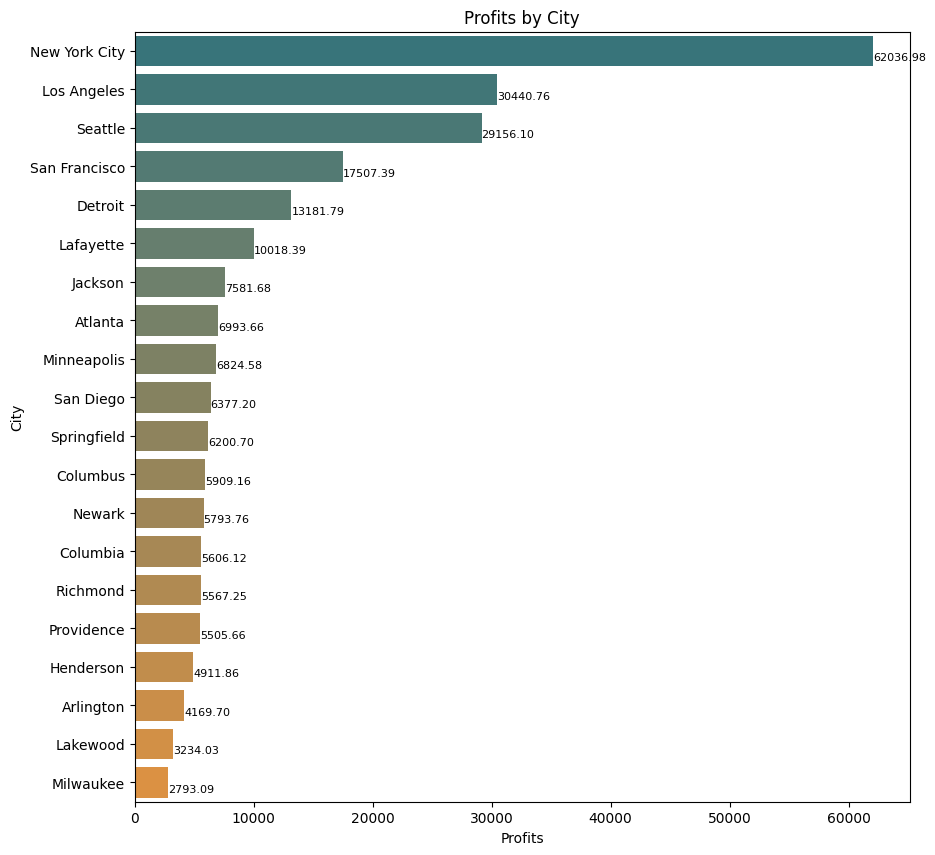

In [ ]:
#@title
# Group the data by city and calculate the sum of profits per city
df_grouped = df.groupby('City')['Profit'].sum().reset_index()

# Sort the profit values in descending order and select the top 20 cities
df_grouped = df_grouped.sort_values(by='Profit', ascending=False).head(20)

# Create a color map with a gradient between the specified colors
cmap = LinearSegmentedColormap.from_list('custom', ['#2D7D85','#F4922A'], N=len(df_grouped))

# Generate a list of colors from the color map
colors = cmap(np.linspace(0, 1, len(df_grouped)))

# Create a horizontal bar chart to show profits by city
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_grouped, x='Profit', y='City', palette=colors, ax=ax)
plt.title('Profits by City')
plt.xlabel('Profits')
plt.ylabel('City')

# Show profit figures next to each bar with a smaller font size and rounded to two decimal places
for i, v in enumerate(df_grouped['Profit']):
    ax.text(v + 3, i + .25, f'{v:.2f}', color='black', fontweight='light', fontsize=8)

plt.show()

We can say that our most profitable and perhaps most loyal consumers are in New York City.

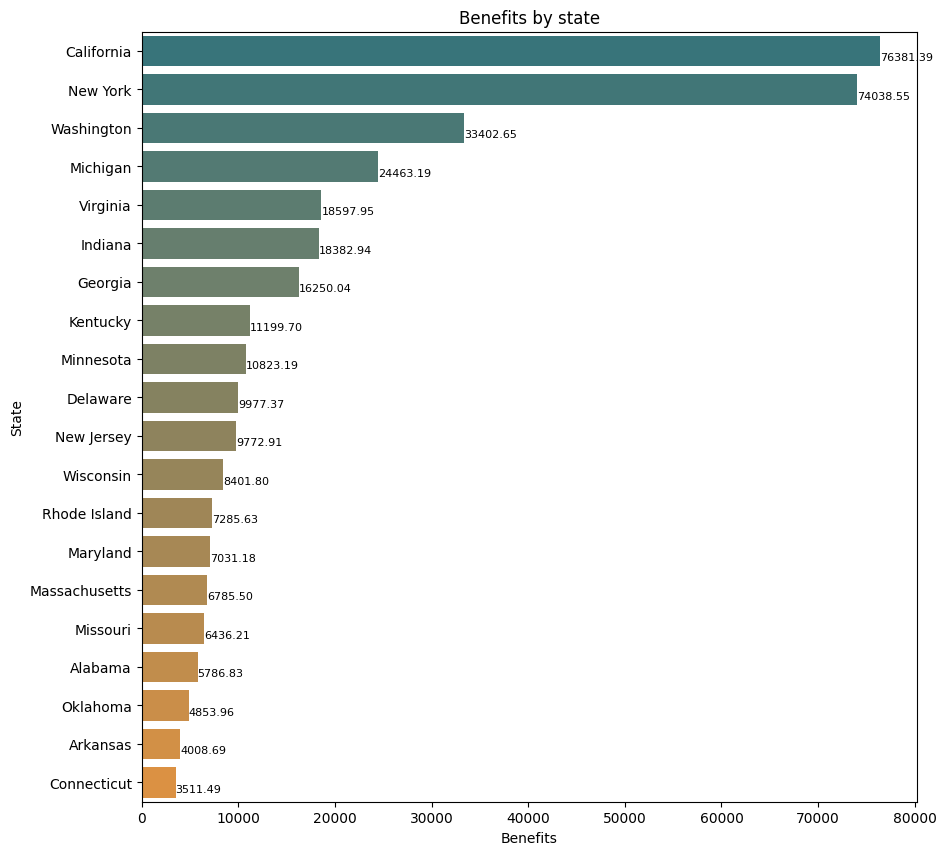

In [ ]:
#@title
# Group the data by city and calculate the sum of benefits per state
df_grouped = df.groupby('State')['Profit'].sum().reset_index()

# Sort the benefit values in descending order and select the first 20 statements
df_grouped = df_grouped.sort_values(by='Profit', ascending=False).head(20)

# Create a horizontal bar chart to show the benefits per city
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_grouped, x='Profit', y='State', palette=colors, ax=ax)
plt.title('Benefits by state')
plt.xlabel('Benefits')
plt.ylabel('State')

# Display profit figures next to each bar in a smaller font size and rounded to two decimal places
for i, v in enumerate(df_grouped['Profit']):
    ax.text(v + 3, i + .25, f'{v:.2f}', color='black', fontweight='light', fontsize=8)

plt.show()

The state of California is the state that has brought us the most benefits, we must improve our relationship with consumers in order not to lose their engagement.

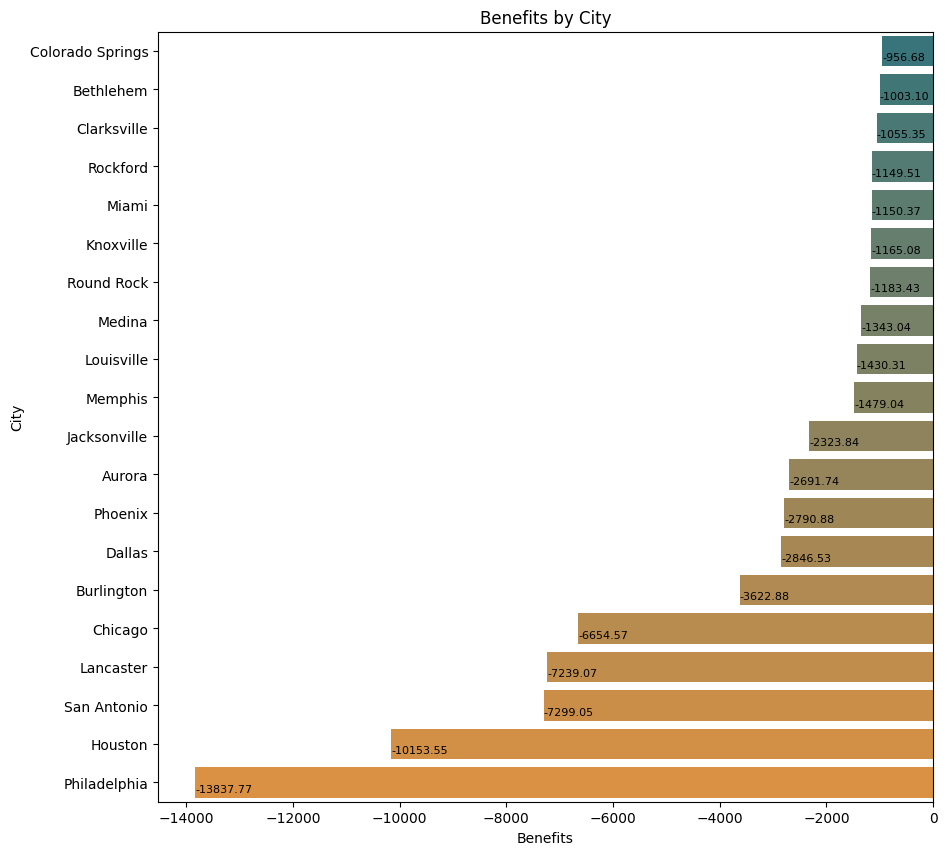

In [ ]:
#@title
# Group the data by city and calculate the sum of the benefits per city.
df_grouped = df.groupby('City')['Profit'].sum().reset_index()

# Sort the profit values in descending order and select the first 20 cities.
df_grouped = df_grouped.sort_values(by='Profit', ascending=False).tail(20)

# Create a horizontal bar chart to show the benefits per city
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_grouped, x='Profit', y='City', palette=colors, ax=ax)
plt.title('Benefits by City')
plt.xlabel('Benefits')
plt.ylabel('City')

# Display profit figures next to each bar in a smaller font size and rounded to two decimal places
for i, v in enumerate(df_grouped['Profit']):
    ax.text(v + 3, i + .25, f'{v:.2f}', color='black', fontweight='light', fontsize=8)

plt.show()

The Philadelphia branch is having serious problems, and an intervention is needed, as it has been incurring heavy losses.

#Financial Analysis

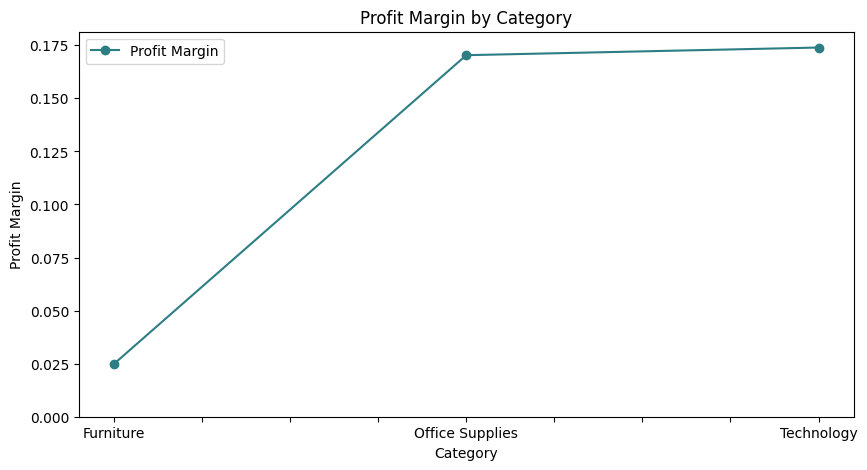

In [43]:
#@title
# Group the data by category and calculate the sum of sales and profits per category
df_grouped = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculate the profit margin per category
df_grouped['Profit Margin'] = df_grouped['Profit'] / df_grouped['Sales']

# Create a line chart to show the profit margin per category
df_grouped.plot.line(x='Category', y='Profit Margin', figsize=(10, 5), color='#2D7D85', marker="o")
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.ylim(0)
plt.show()

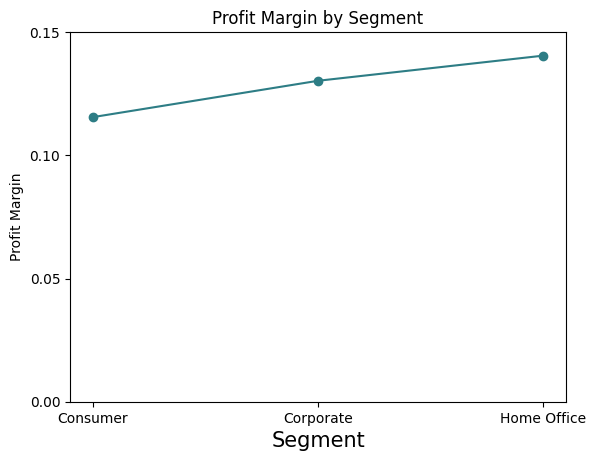

In [46]:
#@title
# Group the data by segment and calculate the sum of sales and profits per segment
df_grouped = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculate the profit margin per segment
df_grouped['Profit Margin'] = df_grouped['Profit'] / df_grouped['Sales']

# Create a line chart to show the profit margin per segment
plt.plot(df_grouped['Segment'], df_grouped['Profit Margin'], color='#2D7D85', marker='o')
plt.title('Profit Margin by Segment')
plt.xlabel('Segment', fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Profit Margin')
plt.ylim(0)
plt.yticks(np.arange(0, max(df_grouped['Profit Margin'])+0.05, 0.05))
plt.show()

In [ ]:
#@title
# Create an interactive scatter plot to explore the relationship between sales and profits
fig = px.scatter(df, x='Sales', y='Profit', color='Discount', color_continuous_scale=['#2D7D85','#F4922A'])
fig.update_layout(title='Relationship between Sales and Profits', xaxis_title='Sales',
                  yaxis_title='Profits')
fig.show()

Gentlemen, we have found our biggest problem. I hope you can distinguish it

In [ ]:
#@title
# Group by Sub-Category and calculate the average discount and profit
discount_profit_by_subcat = df.groupby('Sub-Category').agg({'Discount': 'mean', 'Profit': 'sum', "Quantity": "count"}).reset_index()

# Generate the interactive scatter plot
fig = px.scatter(discount_profit_by_subcat, x='Discount', y='Profit', text='Sub-Category',color="Profit",hover_data=['Quantity'], color_continuous_scale=['#F4922A','#2D7D85'])
fig.update_traces(textposition='top center')
fig.update_layout(title='Impact of Discount and Profit by Sub-Category')
fig.show()

In [ ]:
#@title
#Don't let the pile of names cloud your perception and zoom in. 
# Group by Sub-Category and calculate the discount, profit and average quantity.
discount_profit_quantity_by_subcat = df.groupby('Product Name').agg({'Discount': 'mean', 'Profit': 'sum', 'Quantity': 'count', "Sales":"sum"}).reset_index()

# Generate the interactive scatter plot
fig = px.scatter(discount_profit_quantity_by_subcat, x='Discount', y='Profit', text='Product Name', hover_data=['Quantity', "Sales"],color="Profit", color_continuous_scale=['#F4922A','#2D7D85'])
fig.update_traces(textposition='top center')
fig.update_layout(title='Impact on discount and profit per product')
fig.show()

I am sure you will think what kind of chart this is, but if what we want is to analyze product by product and its profitability this is a chart that will allow us to make a deeper analysis. Just zoom in.

In [ ]:
#@title
#Don't let the pile of names cloud your perception and zoom in. 
# Group by state and calculate discount, profit and average amount
discount_profit_quantity_by_state = df.groupby('State').agg({'Discount': 'mean', 'Profit': 'sum', 'Quantity': 'count'}).reset_index()

# Generate the interactive scatter plot
fig = px.scatter(discount_profit_quantity_by_state, x='Discount', y='Profit', text='State', hover_data=['Quantity'],color="Profit", color_continuous_scale=['#F4922A','#2D7D85'])
fig.update_traces(textposition='top center')
fig.update_layout(title='Impact on discount and profit per state')
fig.show()

In [ ]:
#@title
#Don't let the pile of names cloud your perception and zoom in.  
# Group by city and calculate discount, profit and average quantity
discount_profit_quantity_by_city = df.groupby('City').agg({'Discount': 'mean', 'Profit': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).reset_index()

# Generate the interactive scatter plot
fig = px.scatter(discount_profit_quantity_by_city, x='Discount', y='Profit', text='City', hover_data=['Quantity', "Sales"],color="Profit", color_continuous_scale=['#F4922A','#2D7D85'])
fig.update_traces(textposition='top center')
fig.update_layout(title='Impact on discount and profit per City')
fig.show()

In [ ]:
#@title
# Group by Sub-Category and calculate discount and total profit
discount_profit_by_subcat = df.groupby('Sub-Category').agg({'Quantity': 'count', 'Profit': 'sum'}).reset_index()

# Generate the interactive 3D scatter plot
fig = px.scatter_3d(discount_profit_by_subcat, x='Sub-Category', y='Quantity', z='Profit', text='Sub-Category', color="Profit", color_continuous_scale=['#F4922A','#2D7D85'])
fig.update_traces(textposition='top center')
fig.update_layout(title='Impact on quantity and profit per Sub-Category')
fig.show()

**All thanks to The Sparks Foundation For making this data set**

This is an analysis that I loved to do. I also worked on it in Power Bi and Tableau. I will improve it and upload it. 

I hope you liked it and I hope you find it useful. 
If you have any comments, feel free to write them, I am very interested in improving more. 

If you are interested in connecting I leave you my [Linkedin]("https://www.linkedin.com/in/alejandro-thompson-oporto/") 

I am open to connect with everyone.

**You should never stop learning!!!**

*Greetings and blessings*

Alejandro Thompson Oporto 😎